# Programming with Python

## Lecture 17: Numpy and Matplotlib

### Khachatur Khechoyan

#### Yerevan State University
#### Portmind

In [2]:
# Let's generate random 2D points using numpy
import numpy as np
import matplotlib.pyplot as plt

In [3]:
xy = np.random.uniform(0, 10, (100, 2))

In [5]:
# Let's separate the x and y coordinates
x = xy[:, 0]
y = xy[:, 1]

print(x.shape)
print(y.shape)

(100,)
(100,)


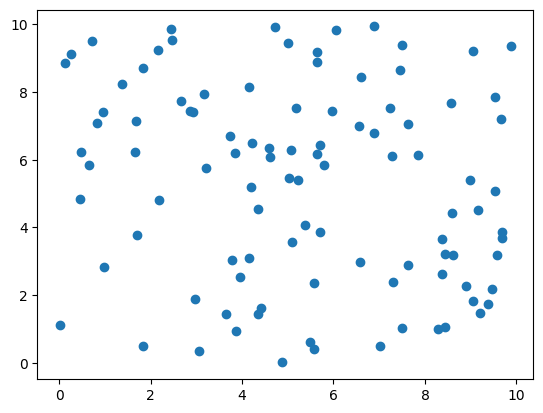

In [6]:
# Let's plot the points
plt.scatter(x, y)
plt.show()

In [28]:
# Now let's create a translation matrix that
# will translate the points by 5 units in the x direction and 2 units in the y direction

In [10]:
l = [[1, 0, 5], [0, 1, 2], [0, 0, 1]]
M_t = np.array(l)

In [9]:
M_t

array([[1, 0, 5],
       [0, 1, 2],
       [0, 0, 1]])

In [11]:
# To use the matrix, we need to convert the points to homogeneous coordinates
xy_h = np.hstack((xy, np.ones((100, 1))))

In [31]:
xy_translated = (M_t @ xy_h.T).T

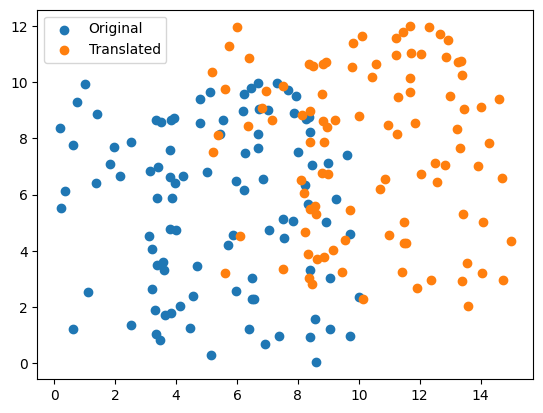

In [32]:
x_translated, y_translated = xy_translated[:, 0], xy_translated[:, 1]
plt.scatter(x, y)
plt.scatter(x_translated, y_translated)
plt.legend(['Original', 'Translated'])
plt.show()

In [33]:
# Let's create a rotation matrix that will rotate the points by 45 degrees
# around the origin
theta = np.pi / 4
M_r = np.array(
    [
        [np.cos(theta), -np.sin(theta), 0],
        [np.sin(theta), np.cos(theta), 0],
        [0, 0, 1]
    ]
)

In [34]:
xy_rotated = (M_r @ xy_h.T).T

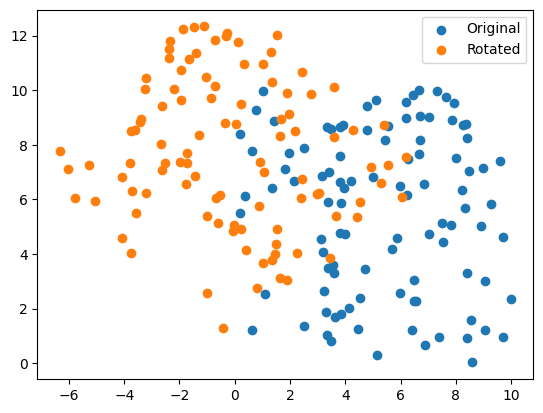

In [35]:
x_rotated, y_rotated = xy_rotated[:, 0], xy_rotated[:, 1]
plt.scatter(x, y)
plt.scatter(x_rotated, y_rotated)
plt.legend(['Original', 'Rotated'])
plt.show()

In [16]:
# Let's rotate the points by 45 degrees around the midpoint of the points
# First, let's find the midpoint
midpoint = np.mean(xy, axis=0)
print(midpoint)

[5.32346623 5.28386234]


In [17]:
# Now let's create a translation matrix that will translate the points
# to the origin
M_t1 = np.array(
    [
        [1, 0, -midpoint[0]],
        [0, 1, -midpoint[1]],
        [0, 0, 1]
    ]
)

In [40]:
# Now let's create a translation matrix that will translate the points
# back to the midpoint
M_t2 = np.array(
    [
        [1, 0, midpoint[0]],
        [0, 1, midpoint[1]],
        [0, 0, 1]
    ]
)

In [41]:
# Now let's rotate the points
xy_rotated_midpoint = (M_t2 @ M_r @ M_t1 @ xy_h.T).T

In [18]:
np.linalg.inv(M_t1)

array([[1.        , 0.        , 5.32346623],
       [0.        , 1.        , 5.28386234],
       [0.        , 0.        , 1.        ]])

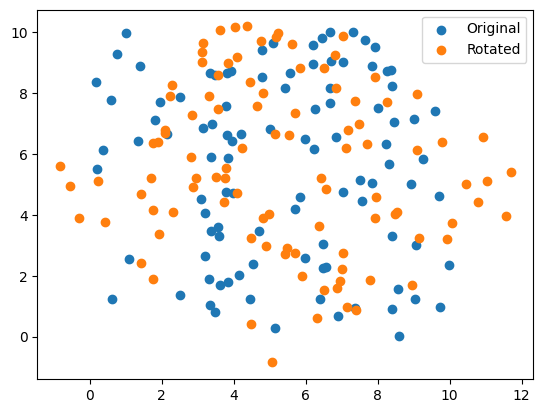

In [42]:
x_rotated_center, y_rotated_center = xy_rotated_midpoint[:, 0], xy_rotated_midpoint[:, 1]
plt.scatter(x, y)
plt.scatter(x_rotated_center, y_rotated_center)
plt.legend(['Original', 'Rotated'])
plt.show()

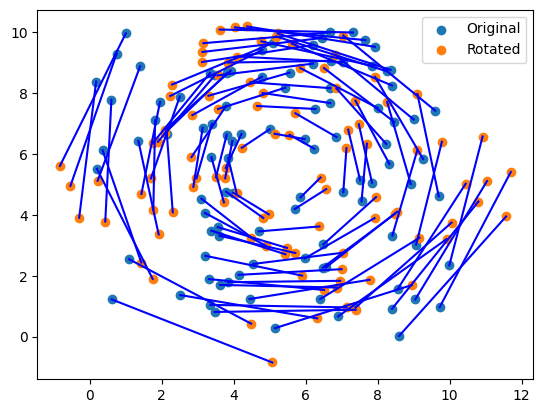

In [43]:
# To better show the rotation, let's plot the points with lines
plt.scatter(x, y)
plt.scatter(x_rotated_center, y_rotated_center)
for i in range(100):
    plt.plot([x[i], x_rotated_center[i]], [y[i], y_rotated_center[i]], 'b')
plt.legend(['Original', 'Rotated'])
plt.show()

In [48]:
# Let's define a function that will apply a transformation matrix to a set of points and plot the results
def plot_transformed_points(xy, M):
    x, y = xy[:,0], xy[:,1]
    xy_h = np.hstack((xy, np.ones((xy.shape[0], 1))))
    xy_transformed = (M @ xy_h.T).T
    x_transformed, y_transformed = xy_transformed[:, 0], xy_transformed[:, 1]
    plt.scatter(x, y)
    plt.scatter(x_transformed, y_transformed)
    plt.legend(['Original', 'Transformed'])
    for i in range(xy.shape[0]):
        plt.plot([x[i], x_transformed[i]], [y[i], y_transformed[i]], 'b', alpha=0.3)
    plt.show()

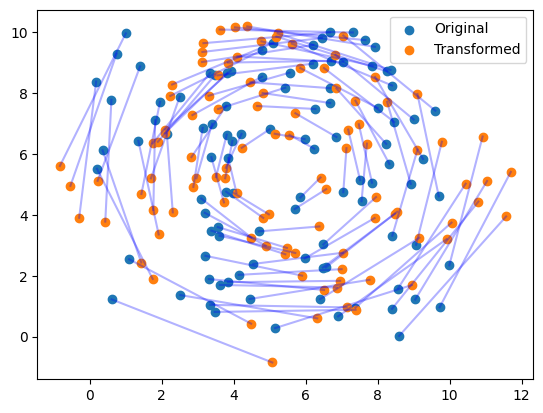

In [52]:
plot_transformed_points(xy, M_t2 @ M_r @ M_t1)

In [53]:
# Let's create a scaling matrix that will scale the points by 2 in the x direction and 3 in the y direction
M_s = np.array(
    [
        [2, 0, 0],
        [0, 3, 0],
        [0, 0, 1]
    ]
)

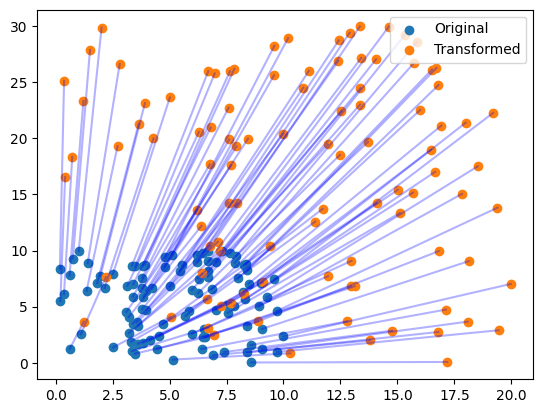

In [54]:
plot_transformed_points(xy, M_s)

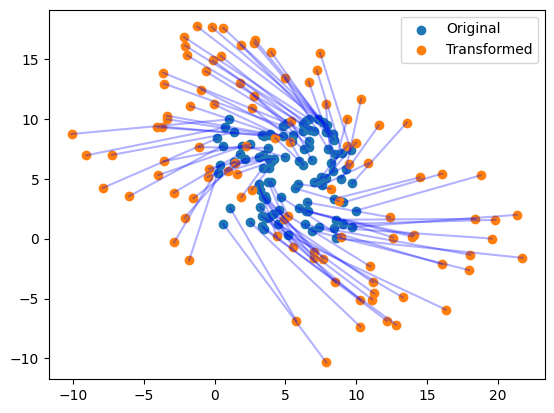

In [60]:
plot_transformed_points(xy,  M_t2 @ M_r @ M_s @ M_t1)

In [61]:
M_inv = np.linalg.inv(M_t2 @ M_r @ M_s @ M_t1)

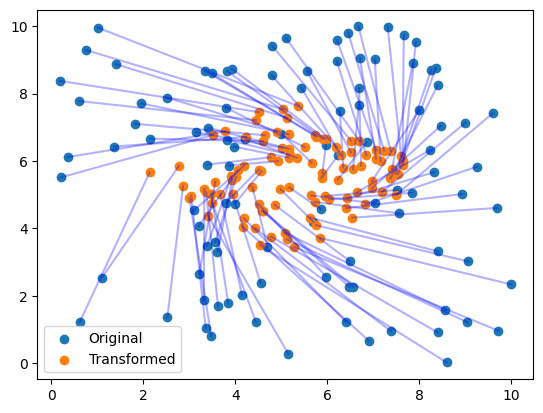

In [63]:
plot_transformed_points(xy,  M_inv)

## Some more simple plotting

### Let's plot graph of function $sin(1/x)$ on interval [0.02, 1]

In [19]:
x = np.linspace(0.02, 1, 10000)

In [22]:
sin_1_x = np.sin(1 / x)

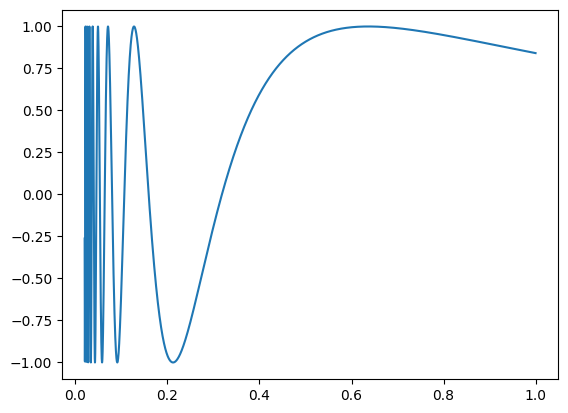

In [23]:
plt.plot(x, sin_1_x)
plt.show()

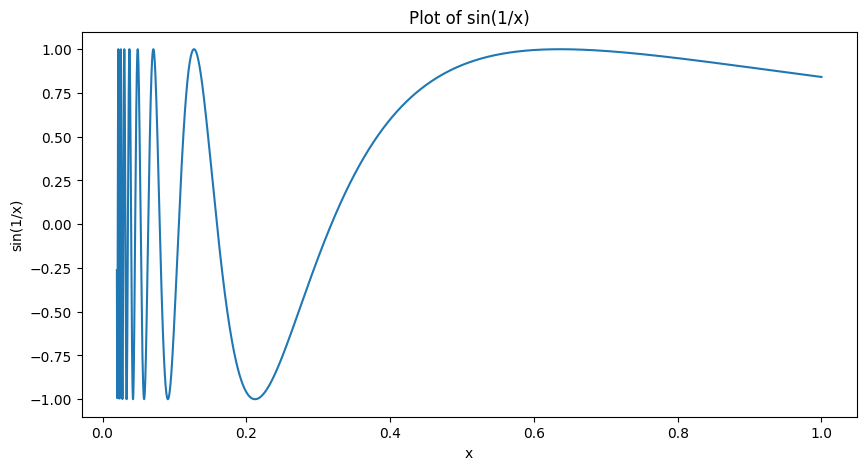

In [98]:
# Let's make the plot look better
plt.figure(figsize=(10, 5))
plt.plot(x, sin_1_x)
plt.xlabel('x')
plt.ylabel('sin(1/x)')
plt.title('Plot of sin(1/x)')
plt.show()


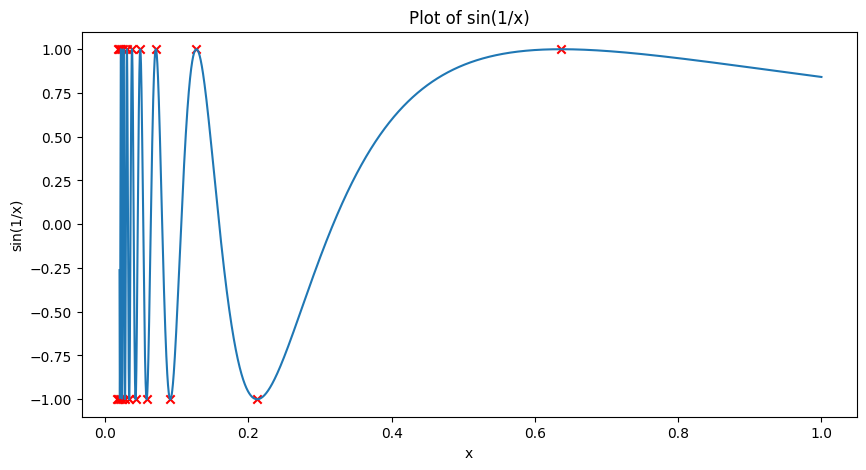

In [107]:
# Let's also plot the extrema of this function
extrema = 1 / (np.pi / 2 + np.pi * np.arange(0, 20))
plt.figure(figsize=(10, 5))
plt.plot(x, sin_1_x)
plt.xlabel('x')
plt.ylabel('sin(1/x)')
plt.title('Plot of sin(1/x)')
plt.scatter(extrema, np.sin(1/extrema), c='r', marker='x')

### Let's generate a random walk

In [235]:
start_point = 10
up_or_down = np.random.choice([-1, 1], 10000)
path = start_point + up_or_down.cumsum()

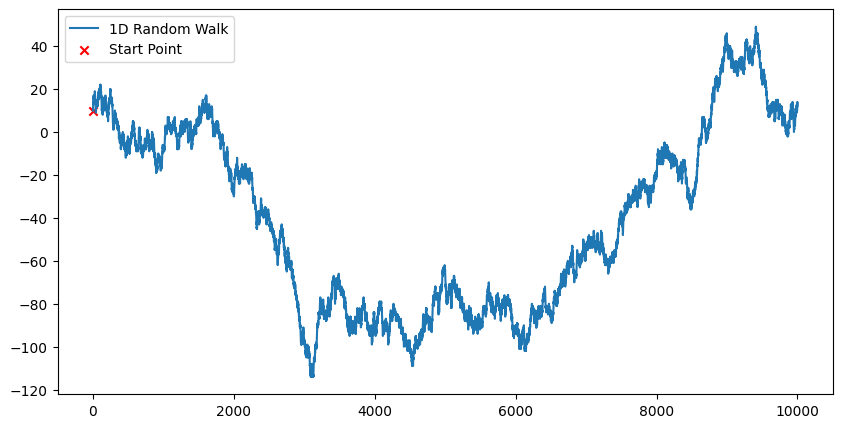

In [236]:
plt.figure(figsize=(10, 5))
plt.plot([start_point] + list(path))
plt.scatter(0, start_point, c='r', marker='x')
plt.legend(['1D Random Walk', 'Start Point'])
plt.show()

In [269]:
# Let's create a 2D random walk
directions = np.array([
    [1, 0],
    [0, 1],
    [-1, 0],
    [0, -1]
])
direction_choices = np.random.choice(4, 10000)
directions_chosen = directions[direction_choices]

In [270]:
start_point = np.array([0, 0])
path = start_point + directions_chosen.cumsum(axis=0)

In [271]:
path = np.vstack((start_point, path))

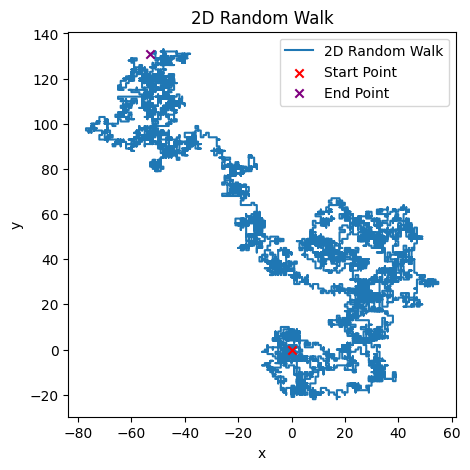

In [272]:
plt.figure(figsize=(5, 5))
plt.plot(path[:, 0], path[:, 1], zorder=0)
plt.scatter(start_point[0], start_point[1], c='r', marker='x', zorder=1)
plt.scatter(path[-1, 0], path[-1, 1], c='purple', marker='x', zorder=1)
plt.legend(['2D Random Walk', 'Start Point', 'End Point'])
plt.xlabel('x')
plt.ylabel('y')
plt.title('2D Random Walk')
plt.show()